In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [5]:
data_train_path = 'FishImgDataset/train'
data_test_path = 'FishImgDataset/test'
data_val_path = 'FishImgDataset/val'

In [6]:
img_width = 180
img_height =180 

In [7]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 8809 files belonging to 31 classes.


In [8]:
data_cat = data_train.class_names

In [9]:
data_cat

['Bangus',
 'Big Head Carp',
 'Black Spotted Barb',
 'Catfish',
 'Climbing Perch',
 'Fourfinger Threadfin',
 'Freshwater Eel',
 'Glass Perchlet',
 'Goby',
 'Gold Fish',
 'Gourami',
 'Grass Carp',
 'Green Spotted Puffer',
 'Indian Carp',
 'Indo-Pacific Tarpon',
 'Jaguar Gapote',
 'Janitor Fish',
 'Knifefish',
 'Long-Snouted Pipefish',
 'Mosquito Fish',
 'Mudfish',
 'Mullet',
 'Pangasius',
 'Perch',
 'Scat Fish',
 'Silver Barb',
 'Silver Carp',
 'Silver Perch',
 'Snakehead',
 'Tenpounder',
 'Tilapia']

In [10]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 2751 files belonging to 31 classes.


In [11]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 1761 files belonging to 31 classes.


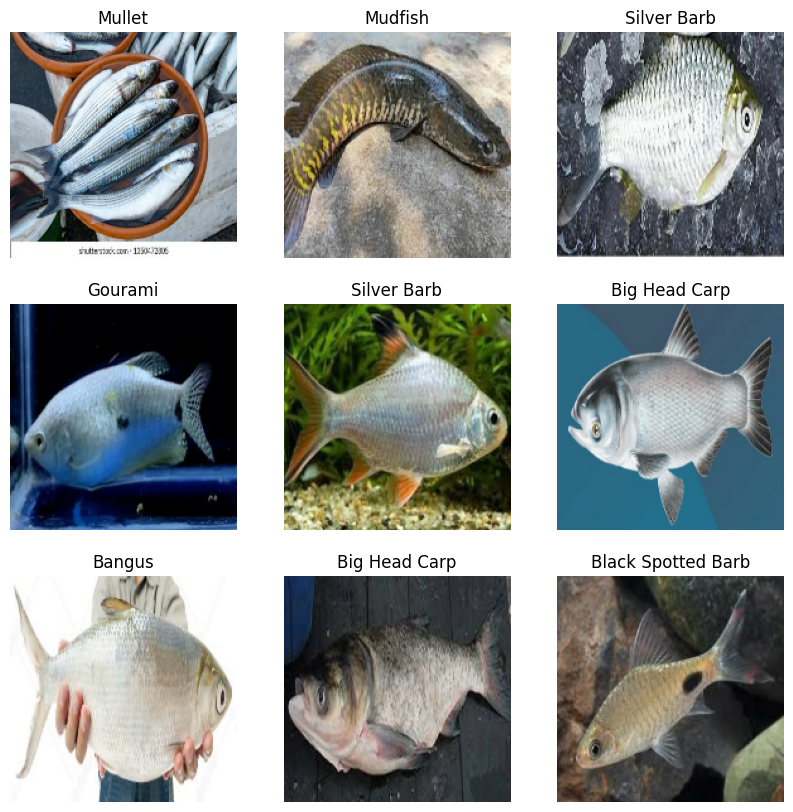

In [12]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [13]:
from tensorflow.keras.models import Sequential

In [14]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [16]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [17]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
276/276 ━━━━━━━━━━━━━━━━━━━━ 49s 171ms/step - accuracy: 0.1916 - loss: 3.3304 - val_accuracy: 0.4689 - val_loss: 1.9573
Epoch 2/25
276/276 ━━━━━━━━━━━━━━━━━━━━ 46s 168ms/step - accuracy: 0.4792 - loss: 1.8903 - val_accuracy: 0.6507 - val_loss: 1.2279
Epoch 3/25
276/276 ━━━━━━━━━━━━━━━━━━━━ 47s 169ms/step - accuracy: 0.6413 - loss: 1.2773 - val_accuracy: 0.7993 - val_loss: 0.7458
Epoch 4/25
276/276 ━━━━━━━━━━━━━━━━━━━━ 46s 167ms/step - accuracy: 0.7883 - loss: 0.7497 - val_accuracy: 0.8513 - val_loss: 0.5923
Epoch 5/25
276/276 ━━━━━━━━━━━━━━━━━━━━ 46s 166ms/step - accuracy: 0.8617 - loss: 0.4693 - val_accuracy: 0.8771 - val_loss: 0.5339
Epoch 6/25
276/276 ━━━━━━━━━━━━━━━━━━━━ 47s 171ms/step - accuracy: 0.9000 - loss: 0.3438 - val_accuracy: 0.9131 - val_loss: 0.4278
Epoch 7/25
276/276 ━━━━━━━━━━━━━━━━━━━━ 45s 162ms/step - accuracy: 0.9372 - loss: 0.2079 - val_accuracy: 0.9277 - val_loss: 0.4311
Epoch 8/25
276/276 ━━━━━━━━━━━━━━━━━━━━ 45s 162ms/step - accuracy: 0.9419 - loss: 0

Text(0.5, 1.0, 'Loss')

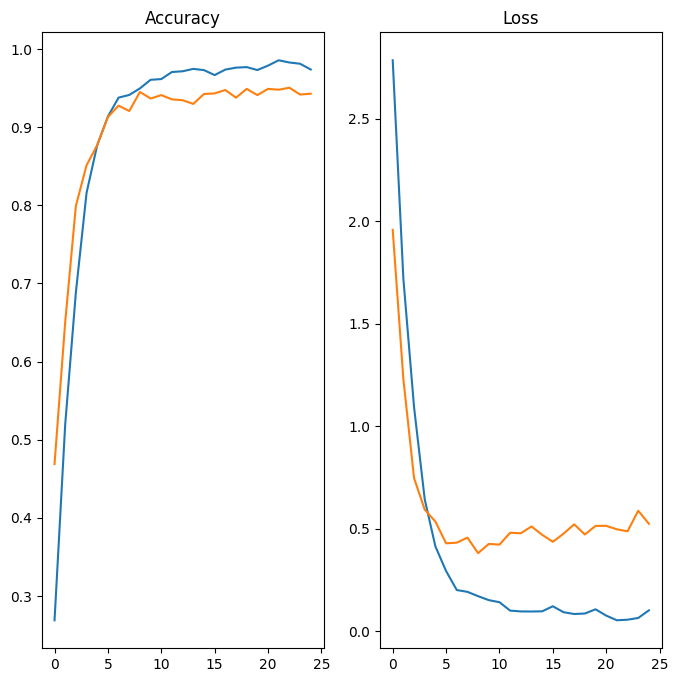

In [18]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [19]:
image = 'Bangus.jpeg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [20]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [21]:
score = tf.nn.softmax(predict)

In [22]:
print('Fish in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Fish in image is Mullet with accuracy of 46.50


In [23]:
model.save('Image_classify.keras')

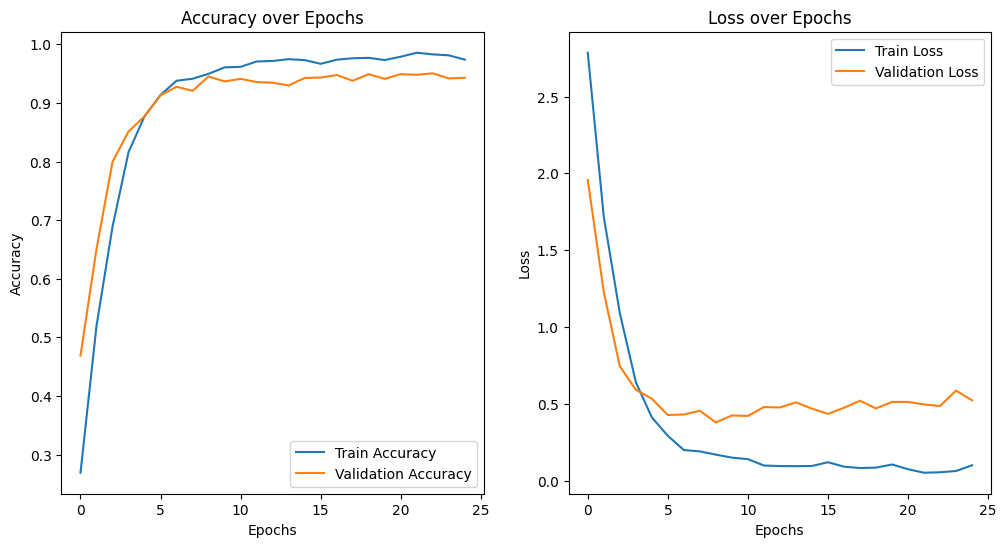

In [26]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    try:
        plt.figure(figsize=(12, 6))

        # Accuracy Plot
        plt.subplot(1, 2, 1)
        if 'accuracy' in history.history:
            plt.plot(history.history['accuracy'], label='Train Accuracy')
        if 'val_accuracy' in history.history:
            plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Loss Plot
        plt.subplot(1, 2, 2)
        if 'loss' in history.history:
            plt.plot(history.history['loss'], label='Train Loss')
        if 'val_loss' in history.history:
            plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Loss over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()
    except Exception as e:
        print("Error while plotting:", e)

# Example Usage
plot_training_history(history)
